In [201]:
import numpy as np
def k_means(points, k):
    maxiter = 1000
    def init_centroids(points, k):
        return points[np.random.randint(points.shape[0], size=k)]
    def get_distances(centroid, points):
        #X_dist = np.sqrt(np.sum(((points-centroid) ** 2), axis=1))
        return np.linalg.norm(points - centroid, axis=1)
        #return X_dist
    classes = np.zeros(points.shape[0], dtype=np.float64)
    distances = np.zeros([points.shape[0], k], dtype=np.float64)
    for i in range(maxiter):
        centroids = init_centroids(points, k)
        # Assign all points to the nearest centroid
        for i, c in enumerate(centroids):
            distances[:, i] = get_distances(c, points)

        # Determine class membership of each point
        # by picking the closest centroid
        classes = np.argmin(distances, axis=1)

        # Update centroid location using the newly
        # assigned data point classes
        for c in range(k):
            centroids[c] = np.mean(points[classes == c], 0)
    return classes

In [202]:
from sklearn import datasets
iris = datasets.load_iris()

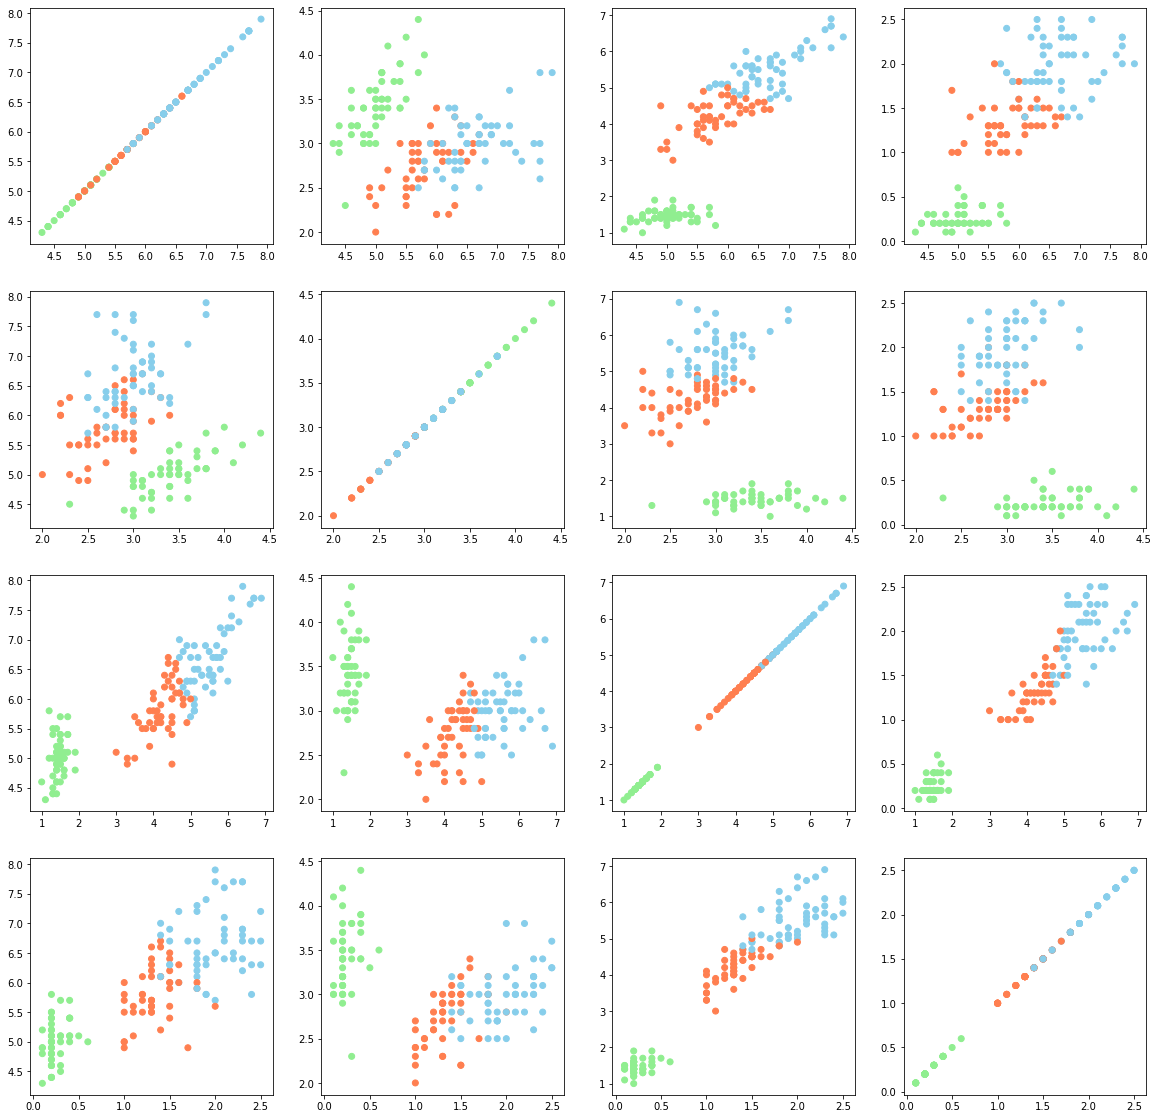

In [203]:
import matplotlib.pyplot as plt
classes = k_means(iris.data, 3)

group_colors = ['skyblue', 'coral', 'lightgreen', 'black', 'purple', 'red']
colors = [group_colors[j] for j in classes]

plot = plt.figure(figsize=(20, 20));
for i in range(4):
    for j in range(4):
        plt.subplot(4, 4, i*4+j+1)
        plt.scatter(iris.data[:,i], iris.data[:,j], color=colors)